In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import learn_vectorfield_from_data
from importlib import reload

# plotting
from importlib import reload
%matplotlib inline

# logger
import logging
logger = logging.getLogger()
logger.setLevel(logging.ERROR)

# matlab
import matlab.engine
try:
    eng = matlab.engine.connect_matlab('shared_davisson')
except matlab.engine.EngineError:
    print('Engine already connected or not able to connect')

In [9]:
shape = 'CShape'
dataset = 'lasa_dataset/{shape}.mat'.format(shape=shape)
matlab_export_file = shape + '.m'
deg_p = 8
deg_f = 4
alpha_p = 1e-4
alpha_f = 0.
make_zero_at_end = True
tau = 0.

In [10]:
tracking_error, opt_vf = learn_vectorfield_from_data.learn_and_output(dataset, 
                                             matlab_export_file, 
                                             deg_p, 
                                             deg_f, 
                                             alpha_p, 
                                             alpha_f, 
                                             tau,
                                             make_zero_at_end)

Fitting a polynomial of degree 8 to lasa_dataset/CShape.mat and learning a vectorfield of degree 4 with tau = 0.0, alpha_p=0.0001, alpha_f=0.0. make_zero_at_end=True
Optimal value: 0.04
Optimal vectorfield f(x_0, x_1) = [72.2349226170431*x_0**4 + 2.66814397847192*x_0**3*x_1 + 201.932424463241*x_0**3 - 10.182208051958*x_0**2*x_1**2 + 290.451468544419*x_0**2*x_1 - 17.0424735984588*x_0**2 - 3.73357848638071*x_0*x_1**3 + 87.395999403855*x_0*x_1**2 + 101.021486037583*x_0*x_1 - 1.88869017015978*x_0 - 0.853841544423678*x_1**4 + 14.5060559612844*x_1**3 + 63.1198670945337*x_1**2 - 4.73403997510331*x_1 - 0.0368726940329912, -19.9216721532109*x_0**4 - 45.0517626997451*x_0**3*x_1 + 84.7036486106388*x_0**3 - 9.2959275081574*x_0**2*x_1**2 - 22.1196668725062*x_0**2*x_1 - 56.7483598323701*x_0**2 + 5.41498667665517*x_0*x_1**3 - 87.0962489321864*x_0*x_1**2 + 10.249009134874*x_0*x_1 + 2.31591171662134*x_0 + 0.708884504258212*x_1**4 - 28.7318003238101*x_1**3 + 22.3061726298014*x_1**2 - 0.925897237672426*x

In [11]:
# load dataset
demo = eng.load(dataset)
for k, v in demo.items():
    eng.workspace[k] = v
    
# run evaluation metrics
matlab_result = eng.eval("lfd_evaluation(@{shape}, demos, 0)"\
                         .format(shape=shape))

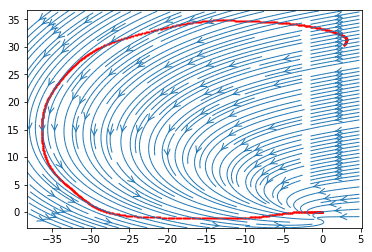

In [12]:
# visualize the vector field
def py_to_mat_array(x):
    x = list(map(list, x))
    s = str(x).replace('],', '];')
    return s
f  = lambda x: np.array(eng.eval('{f}({x})'\
                                 .format(f=shape, 
                                x=py_to_mat_array(x))))
plt.scatter(*np.array(demo['demos'][0]['pos']), s=1, c='r')
limits = list(plt.xlim()) + list(plt.ylim())
learn_vectorfield_from_data.visualize_vf(f, limits)

In [16]:
# How well does the dynamical system represent the demonstrations?
keys  = 'trajectory_error velocity_error distance_to_goal'.split()
# How long does it take to hit the target
keys += 'dtwd_at_30T duration_to_goal'.split()
pd.DataFrame({k: np.array(matlab_result[k])[0] for k in keys})          

,trajectory_error,velocity_error,distance_to_goal,dtwd_at_30T,duration_to_goal
0,28.073351,54.137010,1.301644,8539.569395,-1.0
1,32.204827,47.986257,1.301843,9939.859802,-1.0
2,34.976770,49.830649,1.301695,7087.209822,-1.0
3,30.481809,53.163139,1.301700,6451.190916,-1.0
4,35.956053,54.284418,1.301756,8605.408301,-1.0
5,35.388290,51.634684,1.301804,9232.210859,-1.0
6,33.230333,45.396620,1.301753,8467.812341,-1.0


In [17]:
grid_dtwd = np.array(matlab_result['grid_dtwd'])
columns = ['demo_{i}'.format(i=i) for i in range(grid_dtwd.shape[1])]
rows = ['x0_{i}'.format(i=i) for i in range(grid_dtwd.shape[0])]
print('grid_dtwd')
pd.DataFrame(grid_dtwd, columns=columns, index=rows).round(1)

grid_dtwd


,demo_0,demo_1,demo_2,demo_3,demo_4,demo_5,demo_6
x0_0,25417.8,24951.4,26709.6,25000.2,26472.3,26284.2,25560.1
x0_1,18241.4,19307.5,19543.1,17449.5,20659.4,19822.5,19598.1
x0_2,14781.6,15291.2,15089.4,13495.4,16284.2,15569.3,15742.3
x0_3,16007.9,13040.7,11816.1,13647.5,11973.9,11890.8,12420.7
x0_4,23409.7,25465.7,27345.0,24032.5,28082.6,27463.5,26413.7
x0_5,17697.8,20864.3,21830.9,18400.5,23412.5,22286.6,21547.3
x0_6,12631.7,15582.1,16374.4,13320.7,17991.0,16952.0,16739.6
x0_7,8779.6,10186.2,10355.8,8348.9,11797.1,11081.8,11378.8
x0_8,26559.0,29979.9,32373.1,28289.1,33411.9,32722.6,31127.0
x0_9,20623.4,24589.5,26691.1,22657.3,28087.7,27108.1,25759.0


In [9]:
0

0